# Thyroid Cancer Recurrence Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Embedded Data

**Note:** This is done to avoid having to either fetch the data from the URL (which could be slowish or get removed by the dataset hoster) and to avoid requiring the user of this ipynb to have the data saved into their own Google Drive.

In [2]:
import io
f = io.StringIO("""\
Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
52,M,Yes,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Indeterminate,No
41,F,No,Yes,No,Clinical Hyperthyroidism,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
46,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
51,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
40,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
75,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
59,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
49,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
50,F,No,No,No,Clinical Hyperthyroidism,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
76,F,No,No,No,Clinical Hypothyroidism,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
42,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
40,F,No,Yes,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
44,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
43,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
52,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Indeterminate,No
41,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
44,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
36,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
70,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
60,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
33,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
43,M,No,No,No,Subclinical Hyperthyroidism,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
26,M,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
41,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
37,F,No,Yes,No,Subclinical Hypothyroidism,Normal,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
37,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
30,F,No,No,No,Clinical Hyperthyroidism,Normal,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
36,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
55,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
52,M,Yes,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
37,F,No,No,No,Subclinical Hypothyroidism,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
31,F,No,No,No,Clinical Hyperthyroidism,Diffuse goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
43,M,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
40,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
34,F,No,No,No,Euthyroid,Diffuse goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
51,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
45,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
20,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
38,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
38,F,No,No,No,Clinical Hyperthyroidism,Diffuse goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
33,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
31,F,No,No,No,Clinical Hypothyroidism,Multinodular goiter,No,Micropapillary,Uni-Focal,Intermediate,T1a,N0,M0,I,Excellent,No
31,F,No,No,No,Euthyroid,Multinodular goiter,Right,Papillary,Multi-Focal,Intermediate,T1a,N1b,M0,I,Excellent,No
26,F,No,No,No,Euthyroid,Normal,Extensive,Papillary,Uni-Focal,Intermediate,T1a,N1b,M0,I,Structural Incomplete,Yes
29,F,No,No,No,Euthyroid,Multinodular goiter,No,Follicular,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No
43,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No
30,F,No,No,No,Subclinical Hyperthyroidism,Multinodular goiter,No,Papillary,Multi-Focal,Low,T1b,N0,M0,I,Excellent,No
25,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Multi-Focal,Low,T1b,N0,M0,I,Excellent,No
27,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No
25,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No
21,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Indeterminate,No
43,F,No,Yes,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No
23,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No
23,F,No,No,No,Clinical Hyperthyroidism,Single nodular goiter-left,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No
43,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Indeterminate,No
24,M,No,No,No,Euthyroid,Single nodular goiter-left,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No
35,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No
54,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No
54,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Indeterminate,No
22,F,No,No,No,Subclinical Hyperthyroidism,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No
38,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Multi-Focal,Low,T1b,N0,M0,I,Excellent,No
35,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No
51,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No
22,M,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Multi-Focal,Low,T1b,N0,M0,I,Excellent,No
51,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No
40,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No
69,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No
31,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No
29,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No
30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No
28,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No
22,F,No,No,No,Clinical Hypothyroidism,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No
29,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No
35,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No
50,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Multi-Focal,Low,T1b,N0,M0,I,Excellent,No
27,F,No,No,No,Clinical Hyperthyroidism,Diffuse goiter,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No
17,F,No,Yes,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No
27,F,No,No,No,Subclinical Hyperthyroidism,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No
40,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Intermediate,T1b,N0,M0,I,Excellent,No
33,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Papillary,Uni-Focal,Intermediate,T1b,N1b,M0,I,Indeterminate,No
25,F,No,Yes,Yes,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No
73,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No
36,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Multi-Focal,Low,T1b,N0,M0,I,Indeterminate,Yes
35,F,No,No,No,Euthyroid,Multinodular goiter,Right,Papillary,Multi-Focal,Intermediate,T1b,N1b,M0,I,Structural Incomplete,Yes
31,M,Yes,No,No,Euthyroid,Multinodular goiter,Right,Papillary,Multi-Focal,Intermediate,T1b,N1b,M0,I,Structural Incomplete,Yes
18,F,No,No,No,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,Intermediate,T1b,N1b,M0,I,Structural Incomplete,Yes
62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Follicular,Multi-Focal,Intermediate,T1b,N0,M0,I,Structural Incomplete,Yes
62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Hurthel cell,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
39,F,No,No,No,Euthyroid,Diffuse goiter,No,Hurthel cell,Uni-Focal,Low,T2,N0,M0,I,Indeterminate,No
37,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Hurthel cell,Multi-Focal,Low,T2,N0,M0,I,Excellent,No
26,F,No,Yes,No,Subclinical Hyperthyroidism,Single nodular goiter-right,No,Hurthel cell,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
31,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Hurthel cell,Uni-Focal,Low,T2,N0,M0,I,Indeterminate,No
24,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Follicular,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
57,F,Yes,No,No,Euthyroid,Multinodular goiter,No,Follicular,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
28,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Follicular,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
44,M,Yes,No,No,Euthyroid,Single nodular goiter-right,No,Follicular,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
42,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Follicular,Uni-Focal,Low,T2,N0,M0,I,Indeterminate,No
27,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Follicular,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
51,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
33,F,No,No,No,Clinical Hypothyroidism,Single nodular goiter-right,Right,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
42,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
26,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
24,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
60,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Multi-Focal,Low,T2,N0,M0,I,Excellent,No
60,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Biochemical Incomplete,No
31,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
66,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
44,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
32,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
26,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Multi-Focal,Low,T2,N0,M0,I,Excellent,No
37,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
33,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
23,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Multi-Focal,Low,T2,N0,M0,I,Indeterminate,No
47,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
28,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
37,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
26,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
28,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
28,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
44,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
31,F,No,Yes,No,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
27,F,No,No,No,Clinical Hypothyroidism,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
56,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Biochemical Incomplete,No
63,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
24,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Biochemical Incomplete,No
30,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
31,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
32,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
28,F,No,No,No,Clinical Hyperthyroidism,Multinodular goiter,No,Papillary,Multi-Focal,Low,T2,N0,M0,I,Excellent,No
51,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
20,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
21,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
32,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
26,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
42,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Biochemical Incomplete,No
28,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
41,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
42,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
49,F,No,Yes,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
29,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
29,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
25,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Indeterminate,No
41,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Indeterminate,No
33,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
27,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
50,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
19,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
35,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
63,F,No,No,No,Euthyroid,Normal,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Biochemical Incomplete,No
24,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
36,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
31,M,Yes,No,No,Euthyroid,Single nodular goiter-left,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
24,M,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
33,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
24,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
28,F,No,No,No,Clinical Hypothyroidism,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
22,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
27,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
28,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Indeterminate,No
29,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Papillary,Multi-Focal,Low,T2,N0,M0,I,Excellent,No
40,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Multi-Focal,Low,T2,N0,M0,I,Excellent,No
31,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
55,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
21,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
40,M,Yes,No,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
38,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
21,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
31,M,Yes,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
30,F,No,No,No,Euthyroid,Normal,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Indeterminate,No
50,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Indeterminate,No
34,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
45,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
52,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
38,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
67,M,Yes,No,No,Euthyroid,Multinodular goiter,No,Papillary,Multi-Focal,Low,T2,N0,M0,I,Excellent,No
72,F,No,No,No,Subclinical Hypothyroidism,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Indeterminate,No
45,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Multi-Focal,Low,T2,N0,M0,I,Excellent,No
45,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Multi-Focal,Low,T2,N0,M0,I,Biochemical Incomplete,No
26,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
67,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
56,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
34,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
50,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
42,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
35,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Multi-Focal,Low,T2,N0,M0,I,Excellent,No
23,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Multi-Focal,Low,T2,N0,M0,I,Excellent,No
44,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Multi-Focal,Low,T2,N0,M0,I,Excellent,No
23,F,No,No,No,Euthyroid,Single nodular goiter-left,Left,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
26,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
61,M,No,No,No,Subclinical Hypothyroidism,Single nodular goiter-left,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
22,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
31,F,No,No,No,Clinical Hyperthyroidism,Diffuse goiter,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
68,F,No,No,No,Clinical Hyperthyroidism,Diffuse goiter,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
57,M,No,No,No,Clinical Hyperthyroidism,Single nodular goiter-left,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
27,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Multi-Focal,Low,T2,N1b,M0,I,Excellent,No
25,F,No,No,No,Euthyroid,Single nodular goiter-right,Right,Papillary,Multi-Focal,Low,T2,N1b,M0,I,Excellent,No
20,M,No,No,No,Subclinical Hypothyroidism,Multinodular goiter,No,Papillary,Multi-Focal,Intermediate,T2,N1b,M0,I,Excellent,No
33,M,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N1b,M0,I,Excellent,No
36,F,No,No,No,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,Low,T2,N1b,M0,I,Excellent,No
36,F,No,No,No,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,Low,T2,N1b,M0,I,Indeterminate,No
40,F,No,No,No,Euthyroid,Multinodular goiter,Left,Papillary,Uni-Focal,Intermediate,T2,N1b,M0,I,Indeterminate,No
17,F,No,No,No,Euthyroid,Multinodular goiter,Right,Papillary,Uni-Focal,Intermediate,T2,N1b,M0,I,Indeterminate,No
24,F,No,No,No,Clinical Hypothyroidism,Multinodular goiter,Bilateral,Papillary,Multi-Focal,Intermediate,T2,N1b,M0,I,Excellent,No
38,F,No,No,No,Euthyroid,Single nodular goiter-right,Right,Papillary,Multi-Focal,Intermediate,T2,N1b,M0,I,Excellent,No
28,F,No,No,No,Euthyroid,Multinodular goiter,Right,Papillary,Uni-Focal,Intermediate,T2,N1b,M0,I,Excellent,No
36,F,No,No,No,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,Intermediate,T2,N1b,M0,I,Indeterminate,No
50,F,No,No,No,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,Intermediate,T2,N1b,M0,I,Indeterminate,No
51,M,No,No,No,Clinical Hyperthyroidism,Single nodular goiter-right,Right,Papillary,Uni-Focal,Intermediate,T2,N1b,M0,I,Indeterminate,No
55,F,No,No,No,Subclinical Hypothyroidism,Multinodular goiter,Bilateral,Papillary,Multi-Focal,Intermediate,T2,N1b,M0,II,Indeterminate,No
31,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N1a,M0,I,Excellent,No
33,F,No,No,No,Clinical Hypothyroidism,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N1a,M0,I,Indeterminate,No
28,F,Yes,No,No,Clinical Hyperthyroidism,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N1a,M0,I,Indeterminate,No
48,M,No,No,No,Euthyroid,Single nodular goiter-left,Left,Papillary,Uni-Focal,Intermediate,T2,N1a,M0,I,Indeterminate,No
40,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N1a,M0,I,Excellent,No
29,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T2,N1a,M0,I,Indeterminate,No
20,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Intermediate,T2,N1a,M0,I,Excellent,No
35,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Indeterminate,No
56,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Structural Incomplete,Yes
20,M,No,No,No,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,Low,T2,N0,M0,I,Structural Incomplete,Yes
62,F,No,No,No,Clinical Hypothyroidism,Multinodular goiter,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Biochemical Incomplete,Yes
17,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,High,T2,N0,M0,I,Structural Incomplete,Yes
21,F,No,No,No,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,Low,T2,N1b,M0,I,Structural Incomplete,Yes
20,M,No,No,No,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,Intermediate,T2,N1b,M0,I,Structural Incomplete,Yes
40,M,Yes,No,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,Intermediate,T2,N1b,M0,I,Structural Incomplete,Yes
38,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Right,Papillary,Multi-Focal,Intermediate,T2,N1b,M0,I,Structural Incomplete,Yes
21,F,No,No,No,Euthyroid,Single nodular goiter-left,Left,Papillary,Uni-Focal,Intermediate,T2,N1b,M0,I,Structural Incomplete,Yes
31,F,No,No,No,Euthyroid,Single nodular goiter-left,Left,Papillary,Uni-Focal,Intermediate,T2,N1b,M0,I,Structural Incomplete,Yes
34,F,No,No,No,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,Intermediate,T2,N1b,M0,I,Structural Incomplete,Yes
60,F,No,No,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,Intermediate,T2,N1b,M0,I,Structural Incomplete,Yes
60,F,No,No,No,Euthyroid,Single nodular goiter-right,Right,Papillary,Multi-Focal,Intermediate,T2,N1b,M0,II,Structural Incomplete,Yes
62,F,No,No,No,Euthyroid,Single nodular goiter-right,Right,Papillary,Multi-Focal,Intermediate,T2,N1b,M0,II,Structural Incomplete,Yes
36,M,No,No,No,Clinical Hyperthyroidism,Multinodular goiter,No,Papillary,Uni-Focal,Intermediate,T2,N1a,M0,I,Indeterminate,Yes
29,F,Yes,No,No,Euthyroid,Single nodular goiter-left,No,Follicular,Uni-Focal,Low,T2,N0,M0,I,Structural Incomplete,Yes
33,M,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Structural Incomplete,Yes
75,M,Yes,No,Yes,Euthyroid,Single nodular goiter-left,No,Follicular,Multi-Focal,High,T2,N0,M1,IVB,Structural Incomplete,Yes
62,M,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Structural Incomplete,Yes
56,M,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Biochemical Incomplete,Yes
52,F,No,No,No,Euthyroid,Multinodular goiter,No,Follicular,Uni-Focal,Low,T3a,N0,M0,I,Biochemical Incomplete,No
35,F,No,No,No,Clinical Hyperthyroidism,Multinodular goiter,No,Papillary,Uni-Focal,Low,T3a,N0,M0,I,Excellent,No
34,F,No,No,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Uni-Focal,Intermediate,T3a,N1b,M0,I,Indeterminate,No
32,F,No,No,No,Euthyroid,Multinodular goiter,No,Hurthel cell,Multi-Focal,Low,T3a,N0,M0,I,Excellent,No
27,F,No,No,No,Clinical Hypothyroidism,Single nodular goiter-right,No,Hurthel cell,Multi-Focal,Low,T3a,N0,M0,I,Excellent,No
52,F,Yes,No,No,Euthyroid,Single nodular goiter-left,Bilateral,Hurthel cell,Multi-Focal,Low,T3a,N0,M0,I,Structural Incomplete,No
46,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Hurthel cell,Multi-Focal,Low,T3a,N0,M0,I,Excellent,No
30,F,No,No,No,Subclinical Hypothyroidism,Normal,Right,Follicular,Uni-Focal,Low,T3a,N0,M0,I,Excellent,No
32,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Follicular,Multi-Focal,Low,T3a,N0,M0,I,Indeterminate,No
25,F,No,No,No,Clinical Hyperthyroidism,Multinodular goiter,No,Follicular,Multi-Focal,Low,T3a,N0,M0,I,Excellent,No
38,F,No,No,No,Euthyroid,Multinodular goiter,No,Follicular,Multi-Focal,Low,T3a,N0,M0,I,Biochemical Incomplete,No
31,M,Yes,Yes,No,Euthyroid,Single nodular goiter-left,No,Follicular,Uni-Focal,Low,T3a,N0,M0,I,Indeterminate,No
37,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Multi-Focal,Low,T3a,N0,M0,I,Excellent,No
21,M,Yes,Yes,No,Euthyroid,Single nodular goiter-left,No,Papillary,Uni-Focal,Low,T3a,N0,M0,I,Biochemical Incomplete,No
34,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Papillary,Uni-Focal,Low,T3a,N0,M0,I,Excellent,No
30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Multi-Focal,Low,T3a,N0,M0,I,Biochemical Incomplete,No
48,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Multi-Focal,Low,T3a,N0,M0,I,Indeterminate,No
31,M,Yes,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Multi-Focal,Low,T3a,N0,M0,I,Excellent,No
52,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Papillary,Multi-Focal,Low,T3a,N0,M0,I,Indeterminate,No
38,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T3a,N0,M0,I,Excellent,No
41,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Multi-Focal,Low,T3a,N0,M0,I,Excellent,No
41,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Multi-Focal,Low,T3a,N0,M0,I,Biochemical Incomplete,No
70,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Papillary,Multi-Focal,Low,T3a,N0,M0,I,Indeterminate,No
19,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Multi-Focal,Low,T3a,N0,M0,I,Excellent,No
41,M,No,No,No,Euthyroid,Single nodular goiter-left,No,Papillary,Uni-Focal,Low,T3a,N0,M0,I,Excellent,No
32,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Papillary,Uni-Focal,Low,T3a,N0,M0,I,Excellent,No
35,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Multi-Focal,Low,T3a,N0,M0,I,Indeterminate,No
39,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Papillary,Uni-Focal,Low,T3a,N0,M0,I,Indeterminate,No
45,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Papillary,Uni-Focal,Low,T3a,N0,M0,I,Excellent,No
46,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Papillary,Multi-Focal,Low,T3a,N0,M0,I,Indeterminate,No
45,F,No,No,No,Clinical Hypothyroidism,Single nodular goiter-left,No,Papillary,Multi-Focal,Low,T3a,N0,M0,I,Indeterminate,No
28,M,Yes,No,No,Euthyroid,Single nodular goiter-left,No,Papillary,Uni-Focal,Low,T3a,N0,M0,I,Indeterminate,No
31,M,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T3a,N0,M0,I,Indeterminate,No
81,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Multi-Focal,Low,T3a,N0,M0,II,Excellent,No
41,M,Yes,No,No,Euthyroid,Single nodular goiter-right,No,Hurthel cell,Multi-Focal,Intermediate,T3a,N0,M0,I,Excellent,No
56,M,Yes,No,No,Euthyroid,Multinodular goiter,No,Hurthel cell,Multi-Focal,Intermediate,T3a,N0,M0,I,Indeterminate,No
47,F,No,No,No,Euthyroid,Multinodular goiter,No,Follicular,Uni-Focal,Intermediate,T3a,N0,M0,I,Indeterminate,No
37,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Follicular,Uni-Focal,Intermediate,T3a,N0,M0,I,Excellent,No
32,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Multi-Focal,Intermediate,T3a,N0,M0,I,Biochemical Incomplete,No
53,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Intermediate,T3a,N0,M0,I,Indeterminate,No
30,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Papillary,Multi-Focal,Intermediate,T3a,N0,M0,I,Excellent,No
34,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Intermediate,T3a,N0,M0,I,Excellent,No
62,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Hurthel cell,Multi-Focal,Intermediate,T3a,N0,M0,II,Indeterminate,No
58,F,No,No,No,Clinical Hyperthyroidism,Multinodular goiter,No,Follicular,Multi-Focal,Intermediate,T3a,N0,M0,II,Indeterminate,No
55,M,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Multi-Focal,Intermediate,T3a,N0,M0,II,Indeterminate,No
21,F,No,No,No,Euthyroid,Single nodular goiter-left,Right,Papillary,Multi-Focal,Low,T3a,N1b,M0,I,Excellent,No
27,F,No,No,No,Euthyroid,Multinodular goiter,Right,Papillary,Multi-Focal,Intermediate,T3a,N1b,M0,I,Excellent,No
46,F,No,No,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,Intermediate,T3a,N1b,M0,I,Indeterminate,No
44,F,No,No,No,Euthyroid,Multinodular goiter,Right,Papillary,Multi-Focal,Intermediate,T3a,N1b,M0,I,Excellent,No
29,F,No,No,No,Euthyroid,Single nodular goiter-left,Left,Papillary,Uni-Focal,Low,T3a,N1a,M0,I,Excellent,No
26,F,No,No,No,Subclinical Hypothyroidism,Multinodular goiter,Right,Papillary,Uni-Focal,Intermediate,T3a,N1a,M0,I,Indeterminate,No
42,M,No,No,No,Subclinical Hypothyroidism,Single nodular goiter-right,No,Papillary,Multi-Focal,Intermediate,T3a,N1a,M0,I,Indeterminate,No
56,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Multi-Focal,Intermediate,T3a,N1a,M0,II,Excellent,No
51,F,No,Yes,No,Euthyroid,Single nodular goiter-right,Right,Hurthel cell,Uni-Focal,Low,T3a,N0,M0,I,Indeterminate,No
61,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Intermediate,T3a,N0,M0,II,Excellent,No
42,M,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Multi-Focal,Low,T3a,N0,M0,I,Structural Incomplete,Yes
34,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T3a,N0,M0,I,Structural Incomplete,Yes
67,F,No,No,No,Euthyroid,Multinodular goiter,No,Hurthel cell,Uni-Focal,Intermediate,T3a,N0,M0,II,Indeterminate,Yes
63,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Follicular,Uni-Focal,Intermediate,T3a,N0,M0,II,Indeterminate,Yes
67,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Uni-Focal,Intermediate,T3a,N0,M0,II,Biochemical Incomplete,Yes
73,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Intermediate,T3a,N0,M0,II,Structural Incomplete,Yes
26,F,No,No,No,Euthyroid,Single nodular goiter-left,Left,Papillary,Uni-Focal,Intermediate,T3a,N1b,M1,I,Structural Incomplete,Yes
30,F,No,No,No,Euthyroid,Multinodular goiter,Right,Papillary,Uni-Focal,Intermediate,T3a,N1b,M0,I,Structural Incomplete,Yes
36,F,No,No,No,Euthyroid,Single nodular goiter-left,Left,Papillary,Multi-Focal,Intermediate,T3a,N1b,M0,I,Indeterminate,Yes
31,F,No,No,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,Intermediate,T3a,N1b,M0,I,Structural Incomplete,Yes
40,F,No,No,No,Euthyroid,Single nodular goiter-right,Right,Papillary,Multi-Focal,Intermediate,T3a,N1b,M0,I,Structural Incomplete,Yes
49,F,No,No,No,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,Intermediate,T3a,N1b,M0,I,Structural Incomplete,Yes
38,M,Yes,No,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Uni-Focal,Intermediate,T3a,N1b,M0,I,Structural Incomplete,Yes
27,F,No,No,No,Euthyroid,Single nodular goiter-right,Bilateral,Papillary,Uni-Focal,Intermediate,T3a,N1b,M0,I,Structural Incomplete,Yes
27,M,No,No,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,Intermediate,T3a,N1b,M0,I,Structural Incomplete,Yes
33,F,No,No,No,Euthyroid,Single nodular goiter-right,Right,Papillary,Multi-Focal,Intermediate,T3a,N1b,M0,I,Biochemical Incomplete,Yes
32,F,No,No,No,Euthyroid,Single nodular goiter-left,Left,Papillary,Multi-Focal,Intermediate,T3a,N1b,M0,I,Structural Incomplete,Yes
29,F,No,No,No,Euthyroid,Multinodular goiter,Right,Papillary,Multi-Focal,Intermediate,T3a,N1b,M0,I,Structural Incomplete,Yes
37,M,No,No,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,Intermediate,T3a,N1b,M0,I,Structural Incomplete,Yes
48,F,No,No,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,Intermediate,T3a,N1b,M0,I,Structural Incomplete,Yes
30,F,No,No,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,Intermediate,T3a,N1b,M0,I,Structural Incomplete,Yes
33,M,No,No,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Uni-Focal,Intermediate,T3a,N1b,M0,I,Structural Incomplete,Yes
80,F,Yes,No,No,Euthyroid,Single nodular goiter-right,Right,Papillary,Multi-Focal,Intermediate,T3a,N1b,M0,II,Structural Incomplete,Yes
62,F,No,No,No,Euthyroid,Multinodular goiter,Right,Papillary,Multi-Focal,Intermediate,T3a,N1b,M0,II,Structural Incomplete,Yes
63,M,Yes,No,No,Euthyroid,Single nodular goiter-right,Right,Papillary,Multi-Focal,Intermediate,T3a,N1b,M0,II,Structural Incomplete,Yes
60,M,No,No,No,Euthyroid,Single nodular goiter-right,Bilateral,Papillary,Multi-Focal,Intermediate,T3a,N1b,M0,II,Structural Incomplete,Yes
79,M,Yes,No,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,Intermediate,T3a,N1b,M0,II,Indeterminate,Yes
65,F,No,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,Intermediate,T3a,N1b,M0,II,Biochemical Incomplete,Yes
35,F,No,No,No,Euthyroid,Single nodular goiter-right,Right,Papillary,Multi-Focal,Intermediate,T3a,N1a,M0,I,Biochemical Incomplete,Yes
58,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Multi-Focal,Intermediate,T3a,N1a,M0,II,Indeterminate,Yes
34,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,High,T3a,N1a,M0,I,Biochemical Incomplete,Yes
56,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Follicular,Multi-Focal,Low,T3a,N0,M0,I,Structural Incomplete,Yes
52,M,Yes,No,No,Euthyroid,Single nodular goiter-left,Right,Follicular,Multi-Focal,Intermediate,T3a,N0,M0,I,Biochemical Incomplete,Yes
51,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Follicular,Uni-Focal,Intermediate,T3a,N0,M0,I,Structural Incomplete,Yes
31,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Follicular,Uni-Focal,Intermediate,T3a,N1a,M0,I,Biochemical Incomplete,Yes
44,M,Yes,No,No,Euthyroid,Single nodular goiter-right,Right,Papillary,Multi-Focal,High,T3a,N1b,M1,II,Structural Incomplete,Yes
15,F,No,No,No,Euthyroid,Normal,Bilateral,Papillary,Multi-Focal,Intermediate,T3a,N1b,M0,I,Structural Incomplete,Yes
29,M,No,No,No,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,Intermediate,T3a,N1b,M0,I,Structural Incomplete,Yes
53,M,No,No,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,Intermediate,T3a,N1b,M0,I,Structural Incomplete,Yes
45,F,No,No,No,Euthyroid,Single nodular goiter-left,Left,Papillary,Multi-Focal,Intermediate,T3a,N1b,M0,I,Structural Incomplete,Yes
38,F,No,No,No,Euthyroid,Single nodular goiter-left,Posterior,Papillary,Multi-Focal,High,T3a,N1b,M1,II,Structural Incomplete,Yes
48,F,No,No,No,Clinical Hyperthyroidism,Multinodular goiter,Left,Hurthel cell,Multi-Focal,Intermediate,T3b,N1a,M0,I,Structural Incomplete,No
42,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Multi-Focal,Intermediate,T3b,N0,M0,I,Indeterminate,No
23,F,No,Yes,No,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,Intermediate,T3b,N1a,M0,I,Structural Incomplete,Yes
22,F,No,No,No,Euthyroid,Multinodular goiter,Right,Papillary,Multi-Focal,Intermediate,T3b,N1a,M0,I,Structural Incomplete,Yes
44,F,No,No,No,Euthyroid,Single nodular goiter-left,Left,Papillary,Multi-Focal,Intermediate,T3b,N1b,M0,I,Structural Incomplete,Yes
31,F,No,No,No,Euthyroid,Single nodular goiter-left,Left,Papillary,Uni-Focal,Intermediate,T3b,N1b,M0,I,Excellent,Yes
25,F,No,No,No,Euthyroid,Multinodular goiter,Left,Papillary,Multi-Focal,Intermediate,T3b,N1b,M0,I,Structural Incomplete,Yes
32,M,No,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,Intermediate,T3b,N1b,M0,I,Structural Incomplete,Yes
82,M,Yes,No,No,Euthyroid,Single nodular goiter-left,Left,Papillary,Uni-Focal,Intermediate,T3b,N1b,M0,II,Structural Incomplete,Yes
58,F,No,No,No,Subclinical Hypothyroidism,Multinodular goiter,Extensive,Papillary,Multi-Focal,Intermediate,T3b,N1b,M0,II,Structural Incomplete,Yes
68,M,Yes,Yes,No,Subclinical Hypothyroidism,Single nodular goiter-left,Bilateral,Papillary,Multi-Focal,Intermediate,T3b,N1b,M0,III,Structural Incomplete,Yes
37,F,No,No,No,Subclinical Hypothyroidism,Single nodular goiter-left,No,Papillary,Multi-Focal,Intermediate,T3b,N1a,M1,II,Structural Incomplete,Yes
59,M,Yes,Yes,No,Clinical Hypothyroidism,Multinodular goiter,No,Hurthel cell,Multi-Focal,Intermediate,T3b,N0,M0,I,Structural Incomplete,Yes
21,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Multi-Focal,Intermediate,T3b,N0,M0,I,Structural Incomplete,Yes
73,F,No,No,No,Euthyroid,Single nodular goiter-right,Right,Papillary,Multi-Focal,High,T3b,N1a,M1,IVB,Structural Incomplete,Yes
35,M,Yes,No,No,Euthyroid,Single nodular goiter-left,Left,Papillary,Multi-Focal,High,T3b,N1b,M1,II,Structural Incomplete,Yes
32,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Multi-Focal,Intermediate,T4a,N0,M0,I,Excellent,No
54,M,Yes,No,No,Euthyroid,Single nodular goiter-left,Right,Hurthel cell,Multi-Focal,Intermediate,T4a,N1b,M0,II,Structural Incomplete,Yes
26,F,Yes,No,No,Euthyroid,Single nodular goiter-left,Bilateral,Hurthel cell,Multi-Focal,High,T4a,N1b,M0,I,Structural Incomplete,Yes
53,F,No,No,No,Euthyroid,Multinodular goiter,Right,Papillary,Uni-Focal,High,T4a,N1b,M0,I,Structural Incomplete,Yes
35,F,No,No,No,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4a,N1b,M0,I,Structural Incomplete,Yes
49,M,No,No,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4a,N1b,M0,I,Structural Incomplete,Yes
34,F,No,No,No,Euthyroid,Multinodular goiter,Right,Papillary,Uni-Focal,High,T4a,N1b,M0,I,Structural Incomplete,Yes
80,F,Yes,Yes,No,Euthyroid,Multinodular goiter,Right,Papillary,Uni-Focal,High,T4a,N1b,M0,III,Structural Incomplete,Yes
67,F,No,No,No,Euthyroid,Single nodular goiter-right,Right,Papillary,Multi-Focal,High,T4a,N1b,M0,III,Structural Incomplete,Yes
68,F,No,No,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4a,N1b,M1,IVB,Structural Incomplete,Yes
71,F,Yes,No,No,Euthyroid,Single nodular goiter-left,No,Follicular,Multi-Focal,High,T4a,N0,M1,IVB,Structural Incomplete,Yes
64,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Follicular,Multi-Focal,High,T4a,N0,M1,IVB,Structural Incomplete,Yes
80,M,Yes,No,No,Euthyroid,Single nodular goiter-left,No,Hurthel cell,Multi-Focal,Intermediate,T4a,N0,M0,II,Structural Incomplete,Yes
56,F,No,No,No,Euthyroid,Multinodular goiter,Posterior,Papillary,Multi-Focal,High,T4a,N1b,M0,II,Structural Incomplete,Yes
71,M,Yes,Yes,No,Subclinical Hypothyroidism,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4a,N1b,M0,III,Structural Incomplete,Yes
78,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,No,Follicular,Multi-Focal,High,T4a,N0,M1,IVB,Structural Incomplete,Yes
51,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Multi-Focal,High,T4a,N1a,M1,II,Structural Incomplete,Yes
67,F,Yes,No,No,Subclinical Hypothyroidism,Multinodular goiter,No,Papillary,Multi-Focal,High,T4a,N0,M0,IVA,Biochemical Incomplete,Yes
31,M,Yes,No,Yes,Euthyroid,Single nodular goiter-left,Extensive,Papillary,Multi-Focal,High,T4a,N1b,M1,II,Structural Incomplete,Yes
62,M,Yes,No,No,Euthyroid,Single nodular goiter-left,Left,Papillary,Multi-Focal,High,T4a,N1b,M1,IVB,Structural Incomplete,Yes
59,F,No,No,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M0,IVB,Structural Incomplete,Yes
40,M,Yes,No,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M0,I,Structural Incomplete,Yes
46,M,Yes,No,No,Euthyroid,Single nodular goiter-left,Bilateral,Follicular,Uni-Focal,High,T4b,N1b,M1,II,Structural Incomplete,Yes
72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes
67,M,Yes,No,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes""")

patient_df = pd.read_csv(f)

del f

## Cleaning

In [3]:
patient_df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


All of these values seem to be properly formed, non-null, and have the same value formats:

In [4]:
def print_all_types_per_column_for_df(df):
  for col in df.columns:
    print(col.ljust(30), end=" ")
    print(df[col].unique())


patient_df.info()
print()

print_all_types_per_column_for_df(patient_df)

print()

isnas = patient_df.isna().any(axis=1)
for na in isnas:
  if na:
    print("NA Value Found:", na)
del isnas, na

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

## EDA

In [5]:
patient_df.describe()

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


Our data has lots of subjects aged 25‒35 (although this still doesn't take up the majority of records and could be a sampling bais):

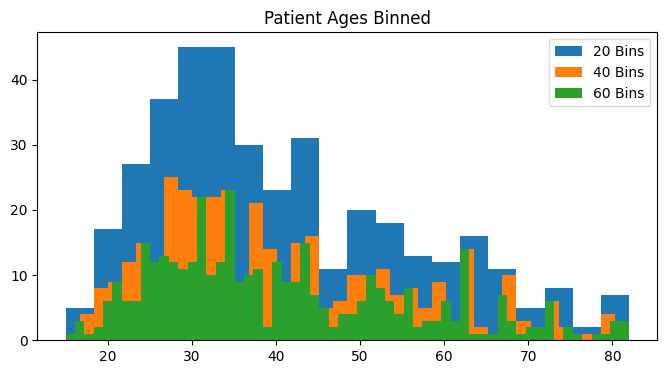

In [6]:
ages = patient_df["Age"]

plt.figure(figsize=(8, 4))
plt.hist(ages, bins=20, label="20 Bins")
plt.hist(ages, bins=40, label="40 Bins")
plt.hist(ages, bins=60, label="60 Bins")
#plt.hist(ages, bins=100, label="100 Bins")
plt.title("Patient Ages Binned")
plt.legend()

plt.show()

del ages

We also have mostly results from females.

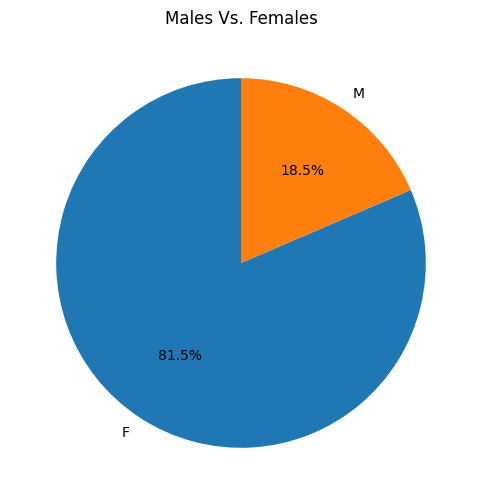

In [7]:
patient_df['Gender'].value_counts().plot(
    kind='pie',
    figsize=(6,6),
    autopct='%1.1f%%',
    startangle=90
)
plt.ylabel("")
plt.title("Males Vs. Females")
plt.show()

Most of the patients are low risk but a moderately large ~30% have the cancer recure:

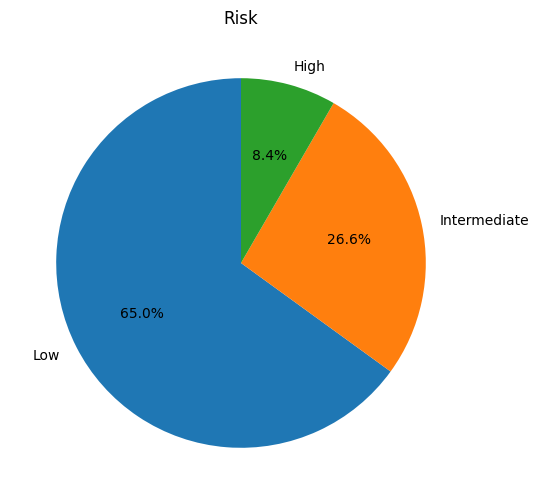

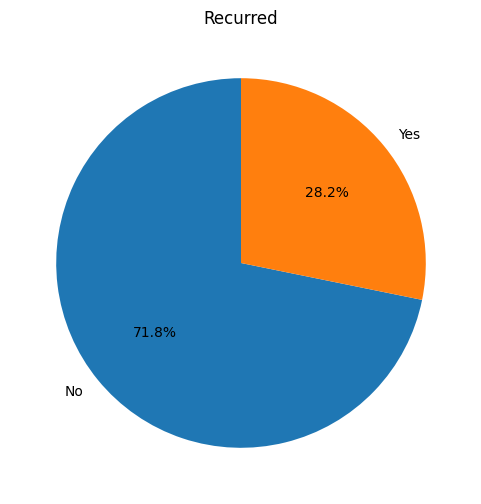

In [8]:
patient_df['Risk'].value_counts().plot(
    kind='pie',
    figsize=(6,6),
    autopct='%1.1f%%',
    startangle=90
)
plt.ylabel("")
plt.title("Risk")
plt.show()

patient_df['Recurred'].value_counts().plot(
    kind='pie',
    figsize=(6,6),
    autopct='%1.1f%%',
    startangle=90
)
plt.ylabel("")
plt.title("Recurred")
plt.show()

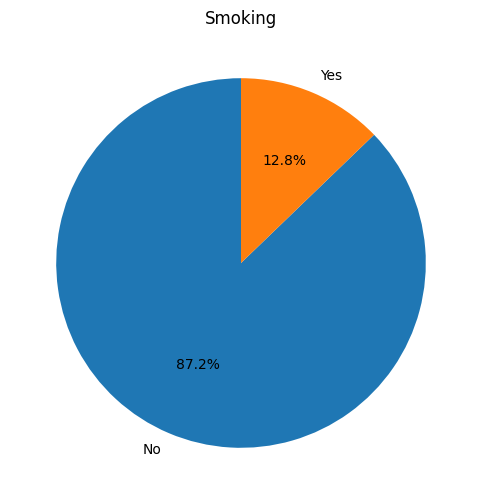

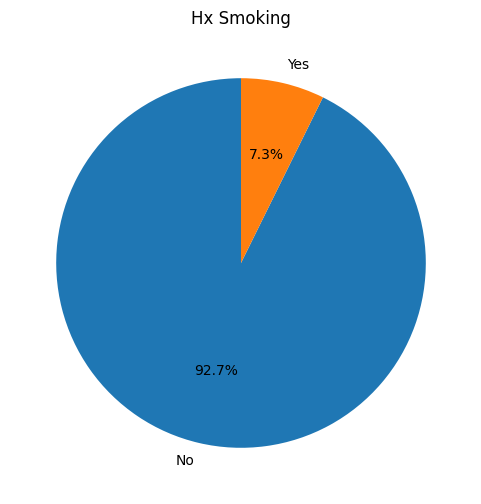

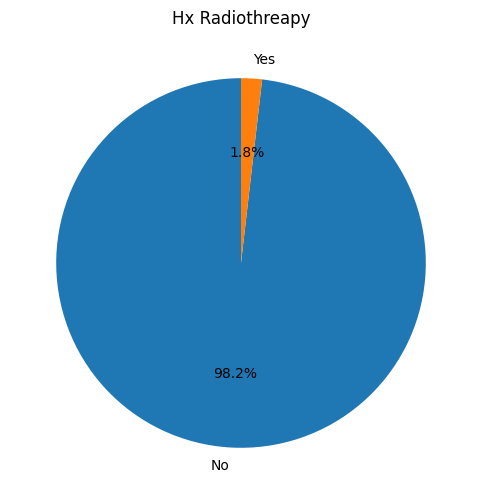

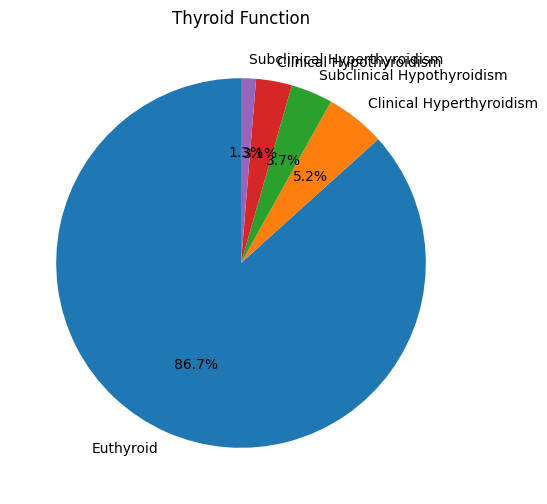

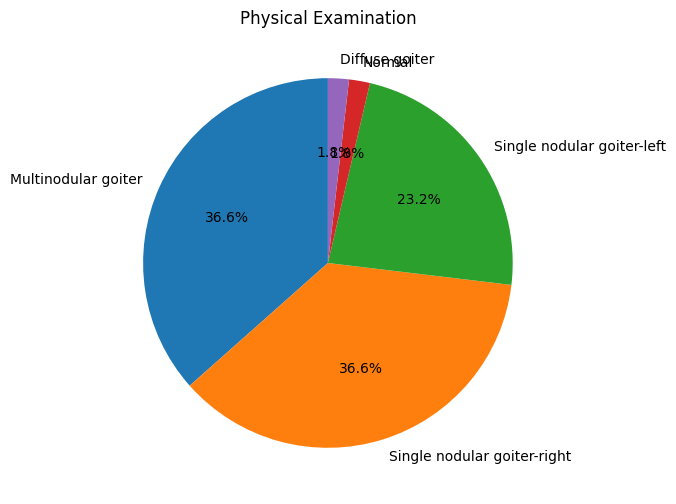

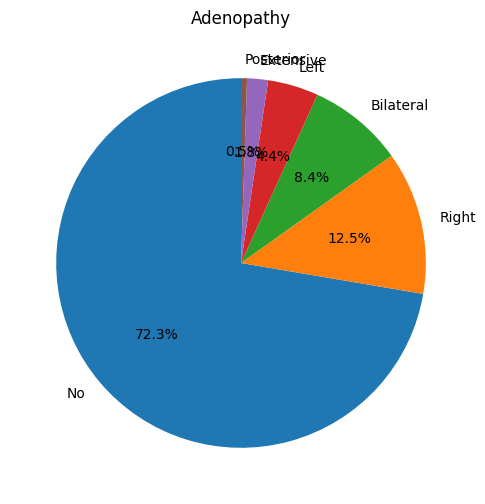

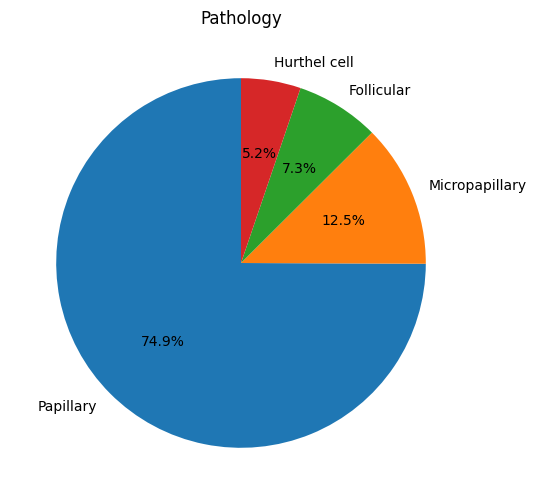

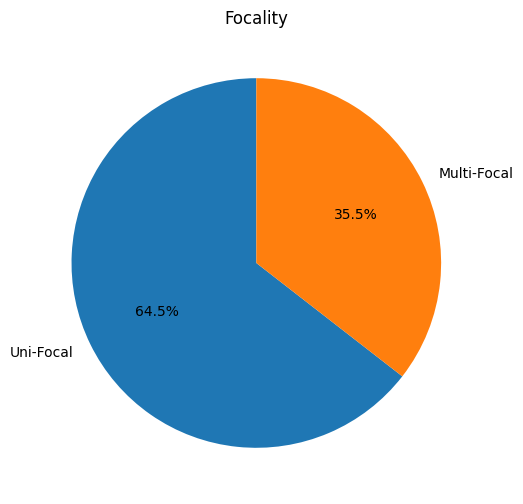

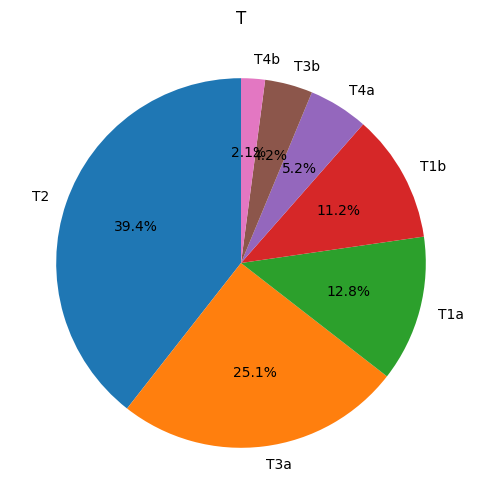

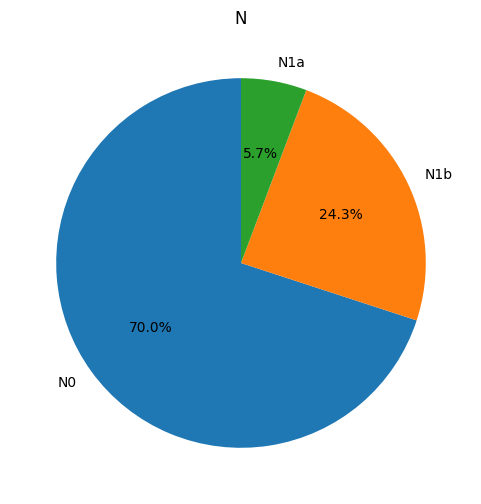

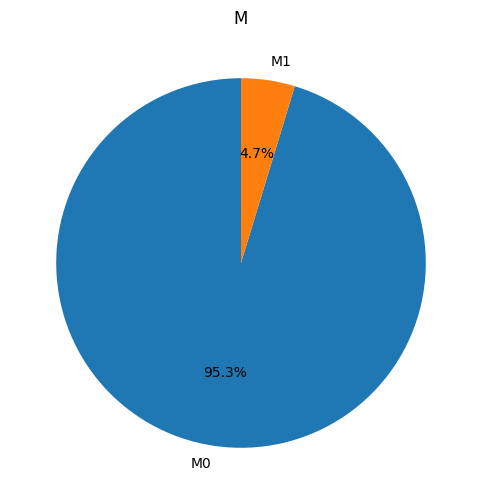

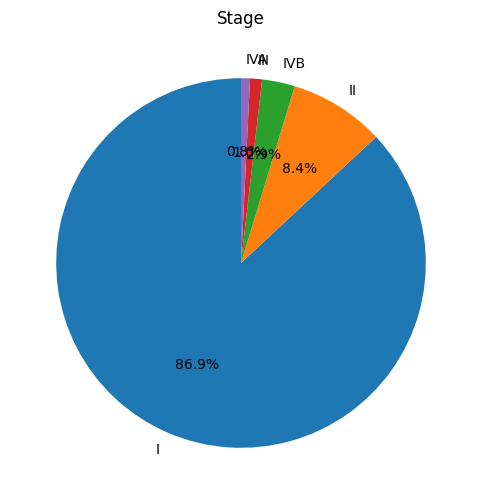

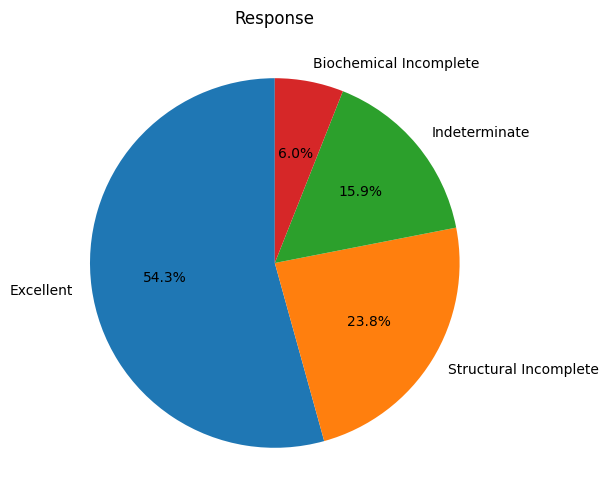

In [9]:
for col in patient_df.columns:
  if col in ["Gender", "Age", "Recurred", "Risk"]:
    continue
  patient_df[col].value_counts().plot(
      kind='pie',
      figsize=(6,6),
      autopct='%1.1f%%',
      startangle=90
  )

  plt.ylabel("")
  plt.title(col)
  plt.show()
del col

## Data Preperation

In [10]:
prepared_df = patient_df.copy(deep=True)

def yes_no_categorical_to_binary(df_col):
  return(df_col.map({"Yes": 1, "No": 0}))

def one_hot_encode(df_col, value_to_encode):
  return((df_col == value_to_encode).map({True: 1, False: 0}))

# Age - skip since it is already

# Gender
prepared_df["Gender"] = patient_df["Gender"].map({"M": 1, "F": 0})

# Smoking
prepared_df["Smoking"] = yes_no_categorical_to_binary(patient_df["Smoking"])

# Hx Smoking
prepared_df["Hx Smoking"] = yes_no_categorical_to_binary(patient_df["Hx Smoking"])

# TODO: Fix this dataset's typo
# Hx Radiotherapy
prepared_df["Hx Radiothreapy"] = yes_no_categorical_to_binary(patient_df["Hx Radiothreapy"])

# Thyroid Function - These appear to be mostly progressive
# TODO: This seems like a bad way to do this
prepared_df["Thyroid Function"] = patient_df["Thyroid Function"].map({
    "Euthyroid": 0, # Proper functioning
    "Subclinical Hyperthyroidism": 1, # Slight overfunction
    "Subclinical Hypothyroidism": -1, # Slight underfunction
    "Clinical Hyperthyroidism": -2, # Overfunction
    "Clinical Hypothyroidism": 2, # Underfunction
  })

# Physical Examination
prepared_df["Physical Examination"] = patient_df["Physical Examination"].map({
    "Normal": 0,
    "Single nodular goiter-left": 1, # TODO: This also seems like poor practice
    "Single nodular goiter-right": 1,
    "Multinodular goiter": 2, # Many nodules
    "Diffuse goiter": 3 # Large nodule
  })

# Adenopathy - These are mutually exclusive
prepared_df = prepared_df.drop("Adenopathy", axis=1)
prepared_df["Adenopathy (Is No)"] = one_hot_encode(patient_df["Adenopathy"], "No")
prepared_df["Adenopathy (Is Right)"] = one_hot_encode(patient_df["Adenopathy"], "Right")
prepared_df["Adenopathy (Is Extensive)"] = one_hot_encode(patient_df["Adenopathy"], "Extensive")
prepared_df["Adenopathy (Is Left)"] = one_hot_encode(patient_df["Adenopathy"], "Left")
prepared_df["Adenopathy (Is Bilateral)"] = one_hot_encode(patient_df["Adenopathy"], "Bilateral")
prepared_df["Adenopathy (Is Posterior)"] = one_hot_encode(patient_df["Adenopathy"], "Posterior")

# Pathology - These are mutually exclusive
prepared_df = prepared_df.drop("Pathology", axis=1)
prepared_df["Pathology (Is Micropapillary)"] = one_hot_encode(patient_df["Pathology"], "Micropapillary")
prepared_df["Pathology (Is Papillary)"] = one_hot_encode(patient_df["Pathology"], "Papillary")
prepared_df["Pathology (Is Follicular)"] = one_hot_encode(patient_df["Pathology"], "Follicular")
prepared_df["Pathology (Is Hurthel cell)"] = one_hot_encode(patient_df["Pathology"], "Hurthel cell")

# Focality
prepared_df = prepared_df.drop("Focality", axis=1)
prepared_df["Focality (Is Multi-Focal?)"] = patient_df["Focality"].map({"Uni-Focal": 0, "Multi-Focal": 1})

# Risk
prepared_df["Risk"] = patient_df["Risk"].map({"Low": 1, "Intermediate": 2, "High": 3})

# T - This is progressive
prepared_df["T"] = patient_df["T"].map({"T1a": 1, "T1b": 2, "T2": 3, "T3a": 4, "T3b": 5, "T4a": 6, "T4b": 7})

# N - This is progressive
prepared_df["N"] = patient_df["N"].map({"N0": 0, "N1a": 1, "N1b": 2})

# M
prepared_df["M"] = patient_df["M"].map({"M0": 0, "M1": 1})

# Stage
prepared_df["Stage"] = patient_df["Stage"].map({"I": 1, "II": 2, "III": 3, "IVA": 4, "IVB": 5})

# Response - These are mutually exclusive
prepared_df = prepared_df.drop("Response", axis=1)
prepared_df["Response (Is Indeterminate)"] = one_hot_encode(patient_df["Response"], "Indeterminate")
prepared_df["Response (Is Excellent)"] = one_hot_encode(patient_df["Response"], "Excellent")
prepared_df["Response (Is Structural Incomplete)"] = one_hot_encode(patient_df["Response"], "Structural Incomplete")
prepared_df["Response (Is Biochemical Incomplete)"] = one_hot_encode(patient_df["Response"], "Biochemical Incomplete")

# Recurred
prepared_df["Recurred"] = yes_no_categorical_to_binary(patient_df["Recurred"])

print_all_types_per_column_for_df(prepared_df)

Age                            [27 34 30 62 52 41 46 51 40 75 59 49 50 76 42 44 43 36 70 60 33 26 37 55
 31 45 20 38 29 25 21 23 24 35 54 22 69 28 17 73 18 39 57 66 32 47 56 63
 19 67 72 61 68 48 81 53 58 80 79 65 15 82 71 64 78]
Gender                         [0 1]
Smoking                        [0 1]
Hx Smoking                     [0 1]
Hx Radiothreapy                [0 1]
Thyroid Function               [ 0 -2  2  1 -1]
Physical Examination           [1 2 0 3]
Risk                           [1 2 3]
T                              [1 2 3 4 5 6 7]
N                              [0 2 1]
M                              [0 1]
Stage                          [1 2 5 3 4]
Recurred                       [0 1]
Adenopathy (Is No)             [1 0]
Adenopathy (Is Right)          [0 1]
Adenopathy (Is Extensive)      [0 1]
Adenopathy (Is Left)           [0 1]
Adenopathy (Is Bilateral)      [0 1]
Adenopathy (Is Posterior)      [0 1]
Pathology (Is Micropapillary)  [1 0]
Pathology (Is Papillary)       [

## Data Correlation

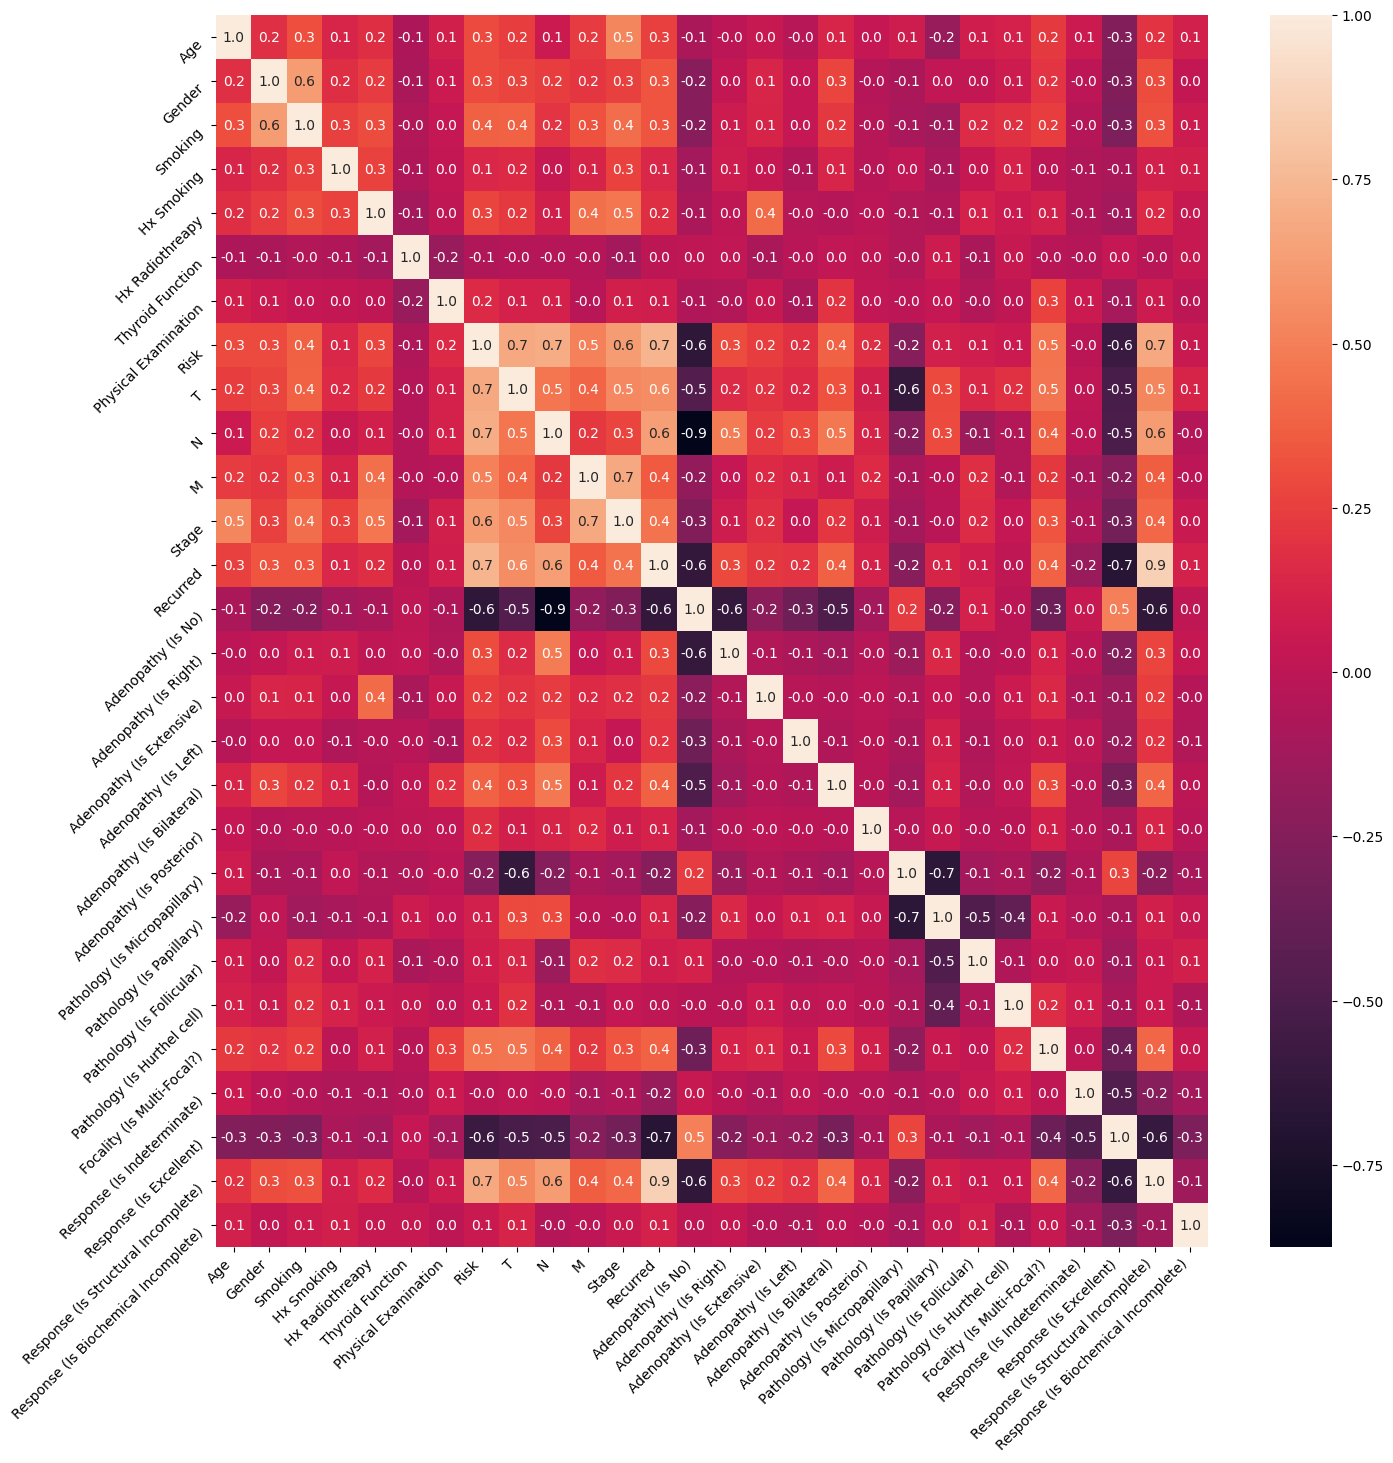

In [11]:
correlation_matrix = prepared_df.corr()

plt.figure(figsize=(16, 16))
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", linewidths=0)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=45, va="top")
plt.show()

## Data Splitting

In [12]:
X = prepared_df.drop(labels=["Recurred"], axis=1)
y = prepared_df["Recurred"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

## Linear Regression

In [13]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

#plt.scatter(y_test, y_pred, label="Actual")
#plt.plot(X_test, y_pred)
#plt.show()

### Feature Importance

========== Abs Sorted Coefficients ==========
               Adenopathy (Is Right) -0.00005
                                 Age  0.00052
                Physical Examination  0.00603
           Adenopathy (Is Extensive) -0.00706
       Pathology (Is Micropapillary) -0.01504
                                   T -0.01638
            Pathology (Is Papillary)  0.01772
                    Thyroid Function  0.02376
          Focality (Is Multi-Focal?) -0.03064
                               Stage  0.04470
                                   N  0.04689
           Adenopathy (Is Bilateral) -0.05431
           Pathology (Is Follicular)  0.05485
Response (Is Biochemical Incomplete)  0.05622
         Pathology (Is Hurthel cell) -0.05753
                     Hx Radiothreapy -0.05826
                          Hx Smoking  0.05952
                             Smoking -0.06015
                  Adenopathy (Is No)  0.06087
           Adenopathy (Is Posterior) -0.06534
                Adenopathy (Is Lef

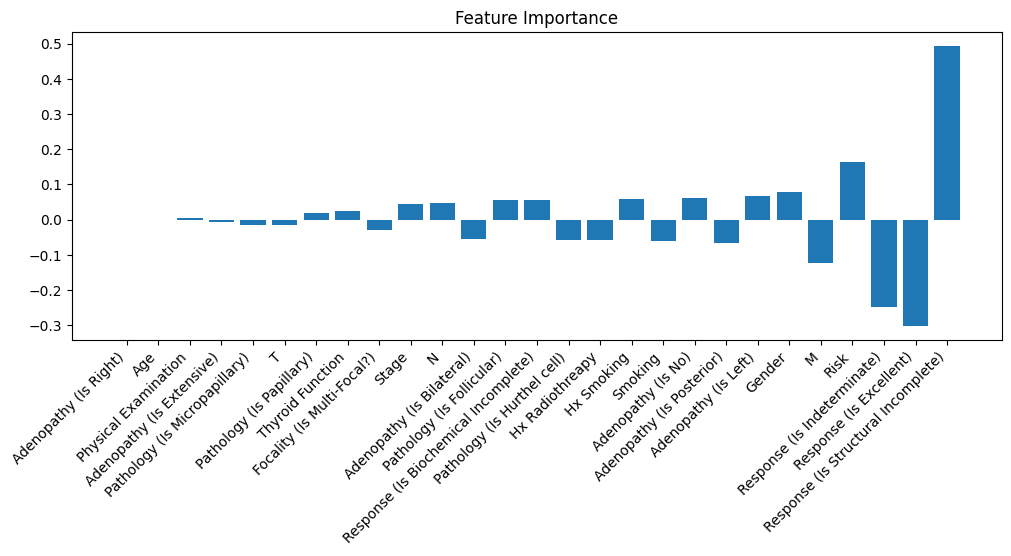

In [14]:
def print_feature_value_table(title, features, values, rjust_value=36, decimals=5):
  print(str(" " + title + " ").center(rjust_value+decimals+4, "="))

  for feat in range(len(features)):
    value_string = f"{values[feat]:.{decimals}f}"
    if value_string[0] != "-":
      value_string = " " + value_string
    print(str(features[feat]).rjust(rjust_value), value_string)
  print()

sorted_idx = np.argsort(abs(lin_reg.coef_))
sorted_features = X.columns[sorted_idx]
sorted_coefs = lin_reg.coef_[sorted_idx]


#print_feature_value_table("Coefficients in Feature Order", X.columns, lin_reg.coef_)
print_feature_value_table("Abs Sorted Coefficients", sorted_features, sorted_coefs)

plt.figure(figsize=(12, 4))
plt.bar(sorted_features, sorted_coefs,)
plt.xticks(rotation=45, ha="right")
plt.title("Feature Importance")
plt.show()

#### Combined Feature Importance

====== Combined Abs Sorted Coefficients =====
                                 Age  0.00023
                Physical Examination  0.00273
                                   T  0.00742
                    Thyroid Function  0.01076
                            Focality  0.01387
                               Stage  0.02024
                                   N  0.02123
                     Hx Radiothreapy  0.02638
                          Hx Smoking  0.02695
                             Smoking  0.02724
                              Gender  0.03555
                                   M  0.05569
                           Pathology  0.06573
                                Risk  0.07365
                          Adenopathy  0.11480
                            Response  0.49749



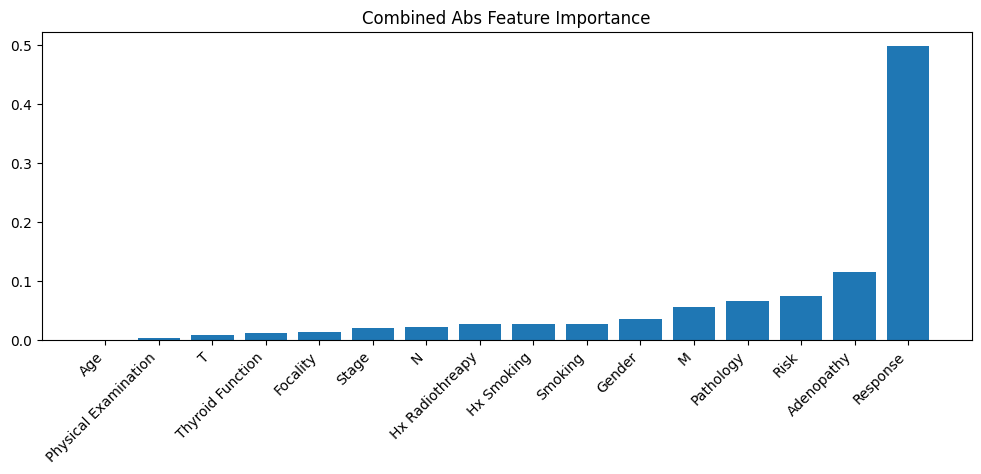

In [15]:
def combine_feature_importance(features, coefs):
  if len(features) != len(coefs):
    raise ValueError(f"Features and coefs must be of the same length:", len(features), len(coefs))

  final_features = []
  final_coefs = []

  for feat, coef in zip(features, coefs):
    pre_parentheses = feat.split("(")
    if len(pre_parentheses) > 2:
      raise ValueError("There shouldn't be multiple parentheses:", pre_parentheses)
    main = pre_parentheses[0].strip()

    #print(f"Grouped '{feat}' as '{main}'")
    #print(main)
    #print(final_features)
    #print(main in final_features)

    if main in final_features:
      idx = final_features.index(main)
      final_coefs[idx] += abs(coef)
    else:
      final_features.append(main)
      final_coefs.append(abs(coef))

  # Scaling must be done since we went from feat==n to feat==(n|n-x)
  # Which makes the total sum be greater than one (assuming feat!=n both times)
  sum_coefs = sum(final_coefs)
  scaler = 1 / sum_coefs
  final_coefs = [coef * scaler for coef in final_coefs]

  return(
      # The np.array prevents errors when trying to use np.argsort()
      np.array(final_features),
      np.array(final_coefs)
  )


combined_features, combined_coefs = combine_feature_importance(
    sorted_features,
    sorted_coefs
)

sorted_combined_idx = np.argsort(np.abs(combined_coefs))
sorted_combined_features = combined_features[sorted_combined_idx]
sorted_combined_coefs = combined_coefs[sorted_combined_idx]

print_feature_value_table(
    "Combined Abs Sorted Coefficients",
    sorted_combined_features,
    sorted_combined_coefs
)

plt.figure(figsize=(12, 4))
plt.bar(sorted_combined_features, sorted_combined_coefs,)
plt.xticks(rotation=45, ha="right")
plt.title("Combined Abs Feature Importance")
plt.show()

### Accuracy

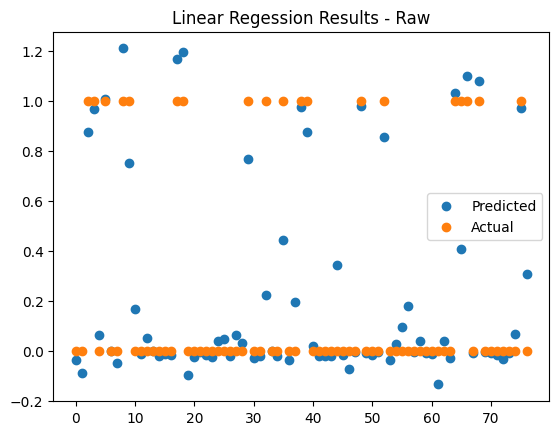

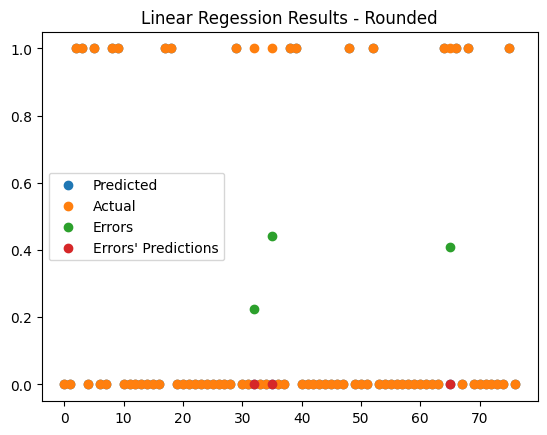

# Test Values: 77
Accuracy: 96.1%
Mean Distance: 0.08388714820732637


In [16]:
plt.scatter(range(len(y_pred)), y_pred, label="Predicted")
plt.scatter(range(len(y_test)), y_test, label="Actual")
plt.title("Linear Regession Results - Raw")
plt.legend()
plt.show()

binary_y_pred = (y_pred >= .5).astype(int)
y_error_idx = np.where(binary_y_pred != y_test)[0]

plt.scatter(range(len(binary_y_pred)), binary_y_pred, label="Predicted")
plt.scatter(range(len(y_test)), y_test, label="Actual")
plt.scatter(y_error_idx, y_pred[y_error_idx], label="Errors")
plt.scatter(y_error_idx, binary_y_pred[y_error_idx], label="Errors' Predictions")
plt.title("Linear Regession Results - Rounded")
plt.legend()
plt.show()

number_of_test_values = len(y_test)
percent_correctly_predicted = (number_of_test_values-len(y_error_idx))/number_of_test_values*100
mean_distance = np.mean(abs(y_pred - y_test))

print("# Test Values:", number_of_test_values)
print("Accuracy:", str(round(percent_correctly_predicted, 1)) + "%")
print("Mean Distance:", mean_distance)

In [17]:
# This is the above but using the train data--this shouldn't be used to evaluate
# anything due to overfitting--and is used purely for visualization of the data.
# It is commented out since it overwrites the variables used above and might
# cause problems for later code
_ = """lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_train)
y_test = y_train

def print_feature_value_table(title, features, values, rjust_value=36, decimals=5):
  print(str(" " + title + " ").center(rjust_value+decimals+4, "="))

  for feat in range(len(features)):
    value_string = f"{values[feat]:.{decimals}f}"
    if value_string[0] != "-":
      value_string = " " + value_string
    print(str(features[feat]).rjust(rjust_value), value_string)
  print()

sorted_idx = np.argsort(abs(lin_reg.coef_))
sorted_features = X.columns[sorted_idx]
sorted_coefs = lin_reg.coef_[sorted_idx]


#print_feature_value_table("Coefficients in Feature Order", X.columns, lin_reg.coef_)
print_feature_value_table("Abs Sorted Coefficients", sorted_features, sorted_coefs)

plt.figure(figsize=(12, 4))
plt.bar(X.columns, sorted_coefs,)
plt.xticks(rotation=45, ha="right")
plt.title("Feature Importance")
plt.show()

#plt.scatter(y_test, y_pred, label="Actual")
#plt.plot(X_test, y_pred)
#plt.show()

plt.scatter(range(len(y_pred)), y_pred, label="Predicted")
plt.scatter(range(len(y_test)), y_test, label="Actual")
plt.title("Linear Regession Results - Raw")
plt.legend()
plt.show()

rounded_y_pred = y_pred.round()
y_error_idx = np.where(rounded_y_pred != y_test)[0]

plt.scatter(range(len(rounded_y_pred)), rounded_y_pred, label="Predicted")
plt.scatter(range(len(y_test)), y_test, label="Actual")
plt.scatter(y_error_idx, y_pred[y_error_idx], label="Errors")
plt.scatter(y_error_idx, rounded_y_pred[y_error_idx], label="Errors' Predictions")
plt.title("Linear Regession Results - Rounded")
plt.legend()
plt.show()"""

## Cost of Measuring Each Feature

This will be different for each medical facility and patient, but the general costs are like so:

In [18]:
class DependentFeature:
  allowed_dependencies = []
  def _ensure_all_dependencies_are_allowed(dependencies_list):
    for dep in dependencies_list:
      if not (dep in DependentFeature.allowed_dependencies):
        raise ValueError(f"Dependency '{dep}' isn't in the allowed dependencies list: {DependentFeature.allowed_dependencies}")
  def __init__(self, dependencies_list):
    if len(dependencies_list) == 0:
      raise ValueError(f"dependencies_list must have at least 1 dependency but 0 were found: {dependencies_list}")
    DependentFeature._ensure_all_dependencies_are_allowed(dependencies_list)
    self.dependencies = dependencies_list

DependentFeature.allowed_dependencies = patient_df.drop("Recurred", axis=1).columns
feature_measuring_costs = {}

# Free questions
feature_measuring_costs["Age"] = 0
feature_measuring_costs["Gender"] = 0
feature_measuring_costs["Smoking"]    = 0 # Current smoking
feature_measuring_costs["Hx Smoking"] = 0 # Past smoking
feature_measuring_costs["Hx Radiothreapy"] = 0 # Has ever tried radiotherapy? # TODO: also fix the dataset typo too

# Cost to find out
# References are listed in the order found
# **MAYBE** TODO: A 'Determines:' section would be nice, but it is likely too late
# for there to be any significant purpose/motive for adding that

# Prices were obtained using healthprices.org's USA national costs with
# "Insurance Prices" slected--not "Medicare Prices"
# Although the averages costs are, the CPT numbers aren't listed (given the
# "bundled" way they are given in, but there **may or may not** be a listing of
# what CPTs are put in which bundles)
# https://www.fairhealthconsumer.org/medical could have been used--and even
# provides uninsured costs too--but it doesn't have a way (or at least a free
# way) to search national costs
# However, in the cases where healthprices.org doesn't have the cost,
# fairhealthconsumer.org will be used with the zip of 60007 Chicago Il,
# (arbitrary zip in the metro area) since it appears to have close to the
# national average healthcare costs
# Since fairhealthconsumer.org returns insured and uninsured costs, the average
# will be taken with the insured cost will be weighted at 92% [1] and the
# uninsured cost will be weighted at the other 8% to determine the average
# national cost: (These costs can vary massively from healthprices.org's values)
def fairhealthconsumer_get_average_prince(_=None, uninsured=None, insured=None):
  # _ is used to make it less likely that the order will be swapped as it makes
  # 3 args needed to reach the insured values, so this encourages explict
  # inputting using insured=<val>
  if uninsured == None or insured == None:
    raise ValueError(f"Both uninsured and insured cost cannot be of type 'None': uninsured: '{uninsured}' insured: '{insured}'")
  if uninsured < insured:
    raise ValueError(f"The uninsured cost should be greater than or equal to the insured cost; please check this.  uninsured: '{uninsured}' insured: '{insured}'")
  weighted_uninsured = uninsured * 0.08
  weighted_insured = insured * 0.92

  total = weighted_uninsured + weighted_insured
  average = round(total / 2, 13) # Round-off floating-point messiness
  return(average)

# 1. https://www.census.gov/library/publications/2024/demo/p60-284.html
#    - 92% of the USA's population had health insurance
"""
Basic syntax (mostly followed consistently):
* <classification>
- <note>
^ <further detailing on obtaining something>
D.B. <whatever something is determined by>
$ <cost>
"""
# Thyroid hormone status (e.g. euthyroid)
feature_measuring_costs["Thyroid Function"] = (
    17 + # TSH [$1]
    12 + # T3 & T4 (only listed grouped) [$2]
    66   # Thyroid antibodies [$3]
)
"""
This appears to be determined through [3]:
- TSH (thyroid-stimulating hormone) blood test [1]
- Triiodothyronine (T3) test [4]
- Thyroxine (T4) test [2]
- Thyroid antibodies test [5] # TODO: Is this always needed?

1. https://medlineplus.gov/lab-tests/tsh-thyroid-stimulating-hormone-test/
2. https://medlineplus.gov/lab-tests/thyroxine-t4-test/
3. https://my.clevelandclinic.org/health/diagnostics/17556-thyroid-blood-tests
   - I think this means all are needed?
4. https://medlineplus.gov/lab-tests/triiodothyronine-t3-tests/
5. https://my.clevelandclinic.org/health/diagnostics/thyroid-antibodies

$1. https://www.healthprices.org/thyroid-stimulating-hormone-tsh-test/national
$2. https://www.healthprices.org/triiodothyronine-t3-thyroxine-t4-test/national
$3. https://www.mdsave.com/procedures/thyroid-peroxidase-tpo-antibodies/d483fecb
    - Using a site that sells stuff as a source isn't great but it was the only
      national average I could find for this test, which seems to be rare and
      specialized.

Values:
  'Euthyroid'
  'Clinical Hyperthyroidism'
  'Clinical Hypothyroidism'
  'Subclinical Hyperthyroidism'
  'Subclinical Hypothyroidism'
"""
# Clinical exam findings
# TODO: This seems to just be a less through version of determining the
# adenopathy, but since they likely require different techniques (and thus,
# different vists), it is probably fine to keep their appointment costs seperate
feature_measuring_costs["Physical Examination"] = 81 # [$1]
"""
Determined by:
- Physical inspection by a doctor [1]
- Imaging (not required) [1]

1. www.ncbi.nlm.nih.gov/books/NBK562161/

$1. https://www.healthprices.org/office-visit-established-patient-moderate-complexity/national

Values:
  'Single nodular goiter-left'
  'Multinodular goiter'
  'Single nodular goiter-right'
  'Normal'
  'Diffuse goiter'
"""
# Lymph node enlargement presence
feature_measuring_costs["Adenopathy"] = 121 # [$1]
"""
This can be determined by:
- A doctor physically inspecting the patient [Inferred 1]
  - This seems to be all that is required to determine this feature's value but
    lab imaging or special procedures [1] might also be needed for further
    analysis

1. https://emedicine.medscape.com/article/956340-clinical

$1. https://www.healthprices.org/office-visit-established-patient-moderate-high/national
    - CPT: 99214

Values:
  'No'
  'Right'
  'Extensive'
  'Left'
  'Bilateral'
  'Posterior'
"""
# Histological subtype of thyroid cancer
feature_measuring_costs["Pathology"] = fairhealthconsumer_get_average_prince(
    uninsured=283, insured=64 # [$1]
)
"""
Determined by:
- A pathologist examining a piece of tissue under a microscope to look for
  cellular and structural charateristics [1]

1. https://www.sbmf.org/what-is-histology-unlock-the-secrets-of-tissue

$1. https://www.fairhealthconsumer.org/medical
    - CPT: 88305
    - "Pathology examination of tissue using a microscope, intermediate complexity"

Value:
  'Micropapillary'
  'Papillary'
  'Follicular'
  'Hurthel cell' # FIXME: Another typo by the dataset makers
"""
# Tumor focality: single vs multifocal
feature_measuring_costs["Focality"] = 139 # [$1]
"""
Determined by:
- Imaging the body using an ultrasound [1]
  - An aspiration biopsy can be used to even further improve the results in
    "accuracy and speed" [1]
  - There seems to be other methods of imaging too, but they would likely be
    more expensive TODO: But they might be needed for more in-depth full body
    imaging?

1. https://pmc.ncbi.nlm.nih.gov/articles/PMC10162831/

$1. https://www.healthprices.org/ultrasound-head-neck/national
    - CPT: 76536 (I am pretty sure)

Values:
  'Uni-Focal'
  'Multi-Focal'
"""


# Depends on other features to determine (Maybe?)
#################################################

# ATA recurrence risk category (Low/Intermediate/High)
feature_measuring_costs["Risk"] = DependentFeature([
    "Adenopathy", "Focality", "Pathology"
])
"""
Determined by:
  Types (they aren't complete--mostly just the relevant info):
  * Low [1]
    - <= 4 cm
      ^ D.B. Adenopathy
    - Only in thyroid
      ^ D.B. Adenopathy
    - Contained/small spread
      ^ D.B. Adenopathy

  * Intermediate [1]
    - Grown through and into tissues around the thyroid
      ^ D.B. Focality
    - Spread to >5 lymph nodes in the neck
      ^ D.B. Focality
    - Invaded blood vessels
      ^ D.B. Pathology

  * High [1]
    - Spread to other body parts
      ^ D.B. Focality
    - Grown into *many* tissues in the neck
      ^ D.B. Pathology
    - Spread to lymph nodes and at least one cancerous is >= 3cm in diameter
      ^ D.B. Focality

**Note:** the ^ dependencies weren't usually explictly stated, but rahter, inferred

1. https://cancer.ca/en/cancer-information/cancer-types/thyroid/prognosis-and-survival/risk-groups

All dependencies:
  Adenopathy
  Focality
  Pathology

Values:
  'Low'
  'Intermediate'
  'High'
"""
# Tumor staging (T1–T4)
feature_measuring_costs["T"] = DependentFeature([
    "Physical Examination", "Focality"
])
"""
Determined by:
- How large and into what structures the tumor has grown [1]
  ^ D.B. Physical Examination
  ^ D.B. Focality [2]

1. https://www.cancer.org/cancer/types/thyroid-cancer/detection-diagnosis-staging/staging.html
2. https://www.cancer.org/cancer/diagnosis-staging/staging.html

All dependencies:
  Physical Examination
  Focality

Values:
  'T1a'
  'T1b'
  'T2'
  'T3a'
  'T3b'
  'T4a'
  'T4b'
"""
# Lymph node involvement (N0, N1a, N1b)
feature_measuring_costs["N"] = DependentFeature([
    "Focality"
])
"""
Determined by:
- If the cancer spread into lymph nodes [1]
  ^ D.B. Focality [2]

1. https://www.cancer.org/cancer/types/thyroid-cancer/detection-diagnosis-staging/staging.html
2. https://www.cancer.org/cancer/diagnosis-staging/staging.html

All dependencies:
  Focality

Values:
  'N0'
  'N1a'
  'N1b'
"""
# Distant metastasis presence (M0/M1)
feature_measuring_costs["M"] = DependentFeature([
    "Focality"
])
"""
Determined by:
- If the cancer has spread to other organs [1]
  ^ D.B. Focality

1. https://www.cancer.org/cancer/types/thyroid-cancer/detection-diagnosis-staging/staging.html

All dependencies:
  Focality

Values:
  'M0'
  'M1'
"""
# Overall cancer stage (I, II, III, IV)
feature_measuring_costs["Stage"] = DependentFeature([
    "Physical Examination", "Focality"
])
"""
Determined by either:
* Clinical stage [1]
  - Physical examination
    ^ D.B. Physical Examination
  - Imaging
    ^ D.B. Focality
  - Biopsies if available (not required)

* Pathological stage (surgical state) [1]
  - This needs surgery, so we will use clinical stage instead

1. https://www.cancer.org/cancer/types/thyroid-cancer/detection-diagnosis-staging/staging.html

TODO: TNM should be used to determine this

All dependencies:
  Physical Examination
  Focality

Values:
  'I'
  'II'
  'III'
  'IVA'
  'IVB'
"""
# Initial treatment response category
feature_measuring_costs["Response"] = DependentFeature([
    "Focality", "Physical Examination", "Thyroid Function"
    # TODO: Maybe Pathology
])
"""
Determined by:
* Indeterminate
  - The other options here weren't determined as being true [Longer, more
    meaningful explaination too 1]

* Excellent
  - No clinical, biochemical, or structural evidence of the cancer [1]

* Structural Incomplete
  - Original cancer remains [1]
    ^ D.B. Focality ? Maybe Pathology
  - New cancer identified near the original or in a far away body part [1]
    ^ D.B. Focality

* Biochemical Incomplete
  - Examination doesn't find tumors [1]
    ^ D.B. Physical Examination
  - Abnormal Tg antibodies [1]
    ^ D.B. Thyroid Function
      - Specifically the thyroid antibody test but the whole function testing
        would *almost certainly* be done before trying to assess the results of
        treatment

1. https://tiro.expert/recommendations/dtc/initial-staging-response-to-therapy/

All dependencies:
  Focality
  Physical Examination
  Thyroid Function
  ? Maybe Pathology

Values:
  'Indeterminate'
  'Excellent'
  'Structural Incomplete'
  'Biochemical Incomplete'
"""


# Ensure all features have costs
assert len(feature_measuring_costs) == len(patient_df.columns) - 1 # Skip the recured column
for col in patient_df.columns:
  if col != "Recurred":
    assert col in feature_measuring_costs

### Feature Cost Combinations

In [19]:
class FeatureSetHandler:
  def __init__(self, feature_measuring_costs):
    self.free_features = []
    self.dependent_features = {}
    self.costful_features = {}

    self.costful_features_binary_selection = 0

    for feat in feature_measuring_costs:
      feat_val = feature_measuring_costs[feat]
      if feat_val == 0:
        self.free_features.append(feat)
      elif isinstance(feat_val, DependentFeature):
        self.dependent_features[feat] = feat_val
      elif feat_val > 0:
        self.costful_features[feat] = feat_val
      else:
        raise ValueError(f"Unexpected value as feature value for feat: '{feat}' of value: '{feat_val}'")
  def _select_features_using_binary_selection(features, mask):
    if mask < 0:
      raise ValueError(f"'mask' cannot be negative: '{mask}'")

    num_features = len(features)

    bits = bin(mask)[2:] # Skip the '0b'
    bits = bits.zfill(num_features) # Pad with zeros to the proper length
    bits = bits[::-1] # Reverse the list
    ###print(bits)

    selected = {}
    for feat, bit in zip(features, bits):
      ###print(feat, bits)
      if bit == "1":
        selected[feat] = features[feat]

    ###print(selected)
    return(selected)

    selected = features.copy() # Avoid changing the original dict

  def feature_set_generator(self):
    max = 2 ** len(self.costful_features)
    while self.costful_features_binary_selection < max:
      features = dict.fromkeys(self.free_features, 0)
      ###features = {}

      # This assumes that there aren't any duplicate keys that would be overwritten
      features.update(FeatureSetHandler._select_features_using_binary_selection(
          self.costful_features,
          self.costful_features_binary_selection
      ))

      # TODO: add dependent features too
      self.costful_features_binary_selection += 1
      yield features

**Note:** the "free" features are always included.

In [ ]:
fs_handler = FeatureSetHandler(feature_measuring_costs)

print("2 **", len(fs_handler.costful_features), "=",
      2**len(fs_handler.costful_features), "Feature Combinations")
for feat_set in fs_handler.feature_set_generator():
  print(feat_set)